In [79]:
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = read_csv("./HousingData.csv")
print(df.head())

df = df[["CRIM", "ZN", "MEDV", "INDUS", "CHAS", "NOX"]].dropna()
X = df[["CRIM", "ZN", "INDUS", "CHAS", "NOX"]].values
y = df["MEDV"].values


'''
x - x min / x max - x min
'''
# scaling
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)




      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
Mean Squared Error: 57.13444374834066
R² Score: 0.3437890519893996


In [80]:
# creating my own loop
import numpy as np

n_samples, n_features = X.shape
#print(n_samples, n_features)
X = np.hstack([X, np.ones((n_samples, 1))])  # last column for bias
#print(X.shape)
w = np.zeros((n_features + 1, 1))  # weights + bias
#print(w.shape)
# Hyperparameters
lr = 0.01
epochs = 1000
cost_history = []

y = df["MEDV"].values.reshape(-1, 1)  # Shape: (n_samples, 1)
# print(y.shape)


(430, 1)


In [81]:
for epoch in range(epochs):
    y_pred = X @ w  # matrix multiplication
    error = y_pred - y
    cost = np.mean(error ** 2)
    cost_history.append(cost)

    # Gradient calculation
    gradients = (2 / n_samples) * (X.T @ error)

    # Update weights
    w -= lr * gradients

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")



Epoch 0, Cost: 596.0208
Epoch 100, Cost: 102.4348
Epoch 200, Cost: 86.5165
Epoch 300, Cost: 77.6413
Epoch 400, Cost: 71.8238
Epoch 500, Cost: 67.9689
Epoch 600, Cost: 65.3830
Epoch 700, Cost: 63.6215
Epoch 800, Cost: 62.3989
Epoch 900, Cost: 61.5314


In [82]:
# Final weights and bias
final_weights = w[:-1]
final_bias = w[-1]
print("\nFinal Weights:", final_weights.ravel())
print("Final Bias:", final_bias.item())

# Predictions and Evaluation
y_pred_final = X @ w
mse = np.mean((y - y_pred_final) ** 2)
print("Final MSE:", mse)



Final Weights: [-4.50003774  9.46343264 -5.77178267  5.68571874 -4.11516966]
Final Bias: 24.823351337448102
Final MSE: 60.90018539000017


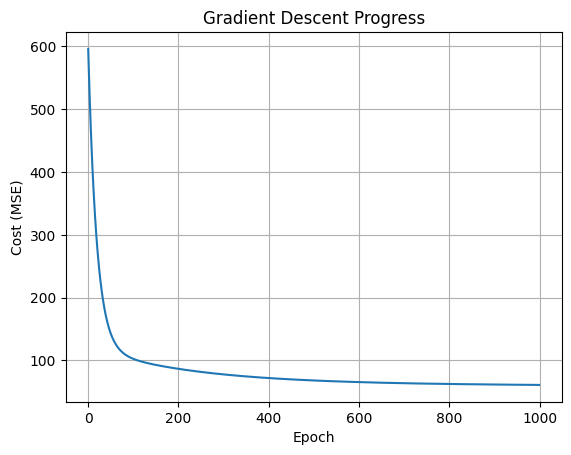

In [83]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), cost_history)
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.grid(True)
plt.show()
